In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot, iplot, init_notebook_mode
import seaborn as sns

pd.set_option('display.max_rows', 500)

In [2]:
# import data
data = pd.read_csv('.../chocolate/data.csv')

# explore 
data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
# explore data type
data.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [4]:
# initial clean

# rename cols for easier manipuation
data.columns = ['company', 'origin_specific', 'REF', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'origin_broad']

# modify data type
data['cocoa_percent'] = data['cocoa_percent'].str.replace('%','').astype(float)/100

# drop rows with null values
data = data.dropna()

data.head()

,company,origin_specific,REF,review_date,cocoa_percent,company_location,rating,bean_type,origin_broad
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


## Exploratory Data Analysis

In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company,1793,416,Soma,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_specific,1793,1038,Madagascar,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1793,NaN,NaN,NaN,1036.13,553.129,5,576,1073,1502,1952
review_date,1793,NaN,NaN,NaN,2012.33,2.92867,2006,2010,2013,2015,2017
cocoa_percent,1793,NaN,NaN,NaN,0.716991,0.0632651,0.42,0.7,0.7,0.75,1
company_location,1793,60,U.S.A.,763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1793,NaN,NaN,NaN,3.18586,0.477668,1,3,3.25,3.5,5
bean_type,1793,41,,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_broad,1793,99,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The initial look at our data tells us a couple of things. First, most of the chocolates in our dataset have a cocoa percentage of around 70%-75%, and have a rating between 3-3.5. The distribution of the cocoa percentages and product ratings can be better seen through visualization (Figure 1 and 2).

As well, the data was compiled with reviews dating from 2006 to 2017, indicating that the information in our dataset is fairly recent and likely up to date. 

## Data Visualization: Rating & Cocoa Percentage

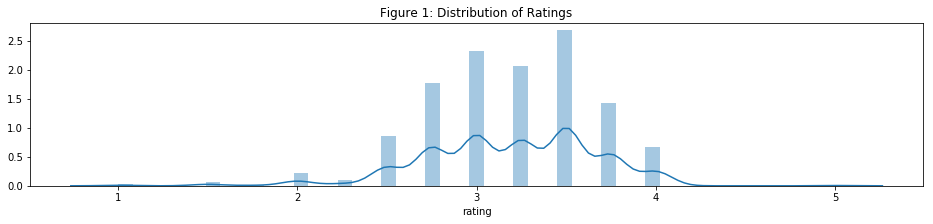

In [6]:
# Distribution of ratings

fig, ax = plt.subplots(figsize=(16,3))
sns.distplot(data['rating'], ax=ax)
ax.set_title('Figure 1: Distribution of Ratings')
plt.show()

- Most chocolates have a rating that fall between the range of 3 and 3.5
- Very few chocolates are rated 1 or 5 
- No chocolates were rated 4.5
- More chocolates were rated 3 or lower than were rated 4 and higher

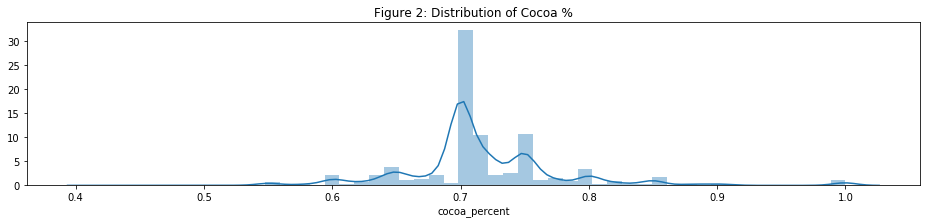

In [7]:
# Distribution of cocoa percentages

fig, ax = plt.subplots(figsize=(16,3))
sns.distplot(data['cocoa_percent'], ax=ax)
ax.set_title('Figure 2: Distribution of Cocoa %')
plt.show()

- An overwhelming number of rated chocolates are 70% cocoa, and majority fall between the range of 70% - 75%

Text(0.5,1,'Figure 3: Rating vs. Cocoa %')

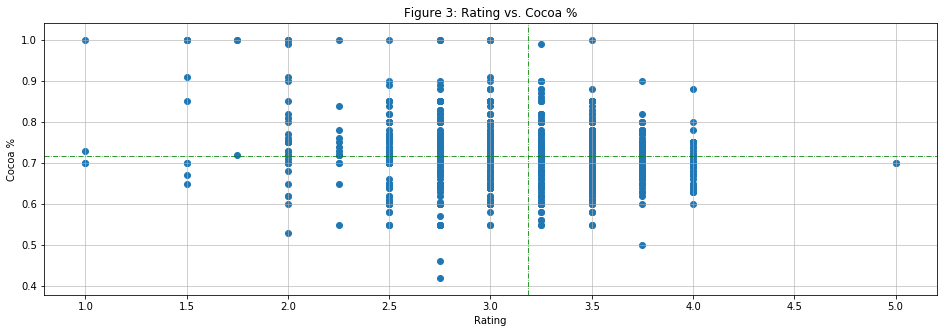

In [8]:
plt.figure(figsize=(16,5))
plt.grid(linewidth=0.6)
plt.scatter(data['rating'], data['cocoa_percent'])
plt.axhline(data['cocoa_percent'].mean(), color='g', linestyle='-.', linewidth=0.8)
plt.axvline(data['rating'].mean(), color='g', linestyle='-.', linewidth=0.8)
plt.xlabel('Rating')
plt.ylabel('Cocoa %')
plt.title('Figure 3: Rating vs. Cocoa %')

Having investigated the distribution of rating and cocoa percentage, I wondered if there is a relationship between the two factors. In other words, are products with a certain percentage of cocoa more highly rated than others? Do products with extreme low/high ratings have specific cocoa percentage in common? 

From this graph we can see:
- Products with the highest rating (5.0) are all 70% cocoa, which is just slightly shy of the average cocoa percentage value of the dataset (72%) 
- There is no identifiable range of cocoa percentage that merits the lowest rating (1.0); it ranges from 70% cocoa to 100%
- Products with 100% cocoa were not viewed with particular favor, with the lowest rating of 1 and the highest of 3.5, not significantly over the average rating of 3.2
- There is no specific/small range of cocoa percentage that reviewers are particularly fond of, but they seem generally comfortable with 55% - 90% cocoa according to this dataset.

## Top 10 Manufacturing Countries - by the number

In [9]:
# explore
data['company_location'].value_counts().head(10)

U.S.A.         763
France         156
Canada         124
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Name: company_location, dtype: int64

In [10]:
# top 10 manufacturers
top_manus = data['company_location'].value_counts().head(10).to_frame().reset_index()
top_manus.columns = ['country', 'count']

m_usa = data[data['company_location'] == 'U.S.A.']['rating'].mean()
m_fra = data[data['company_location'] == 'France']['rating'].mean()
m_can = data[data['company_location'] == 'Canada']['rating'].mean()
m_unk = data[data['company_location'] == 'U.K.']['rating'].mean()
m_ita = data[data['company_location'] == 'Italy']['rating'].mean()
m_ecu = data[data['company_location'] == 'Ecuador']['rating'].mean()
m_aus = data[data['company_location'] == 'Australia']['rating'].mean()
m_blg = data[data['company_location'] == 'Belgium']['rating'].mean()
m_swi = data[data['company_location'] == 'Switzerland']['rating'].mean()
m_ger = data[data['company_location'] == 'Germany']['rating'].mean()

top_manus['rating'] = [m_usa, m_fra, m_can, m_unk, m_ita, m_ecu, m_aus, m_blg, m_swi, m_ger]

top_manus

,country,count,rating
0,U.S.A.,763,3.154980
1,France,156,3.251603
2,Canada,124,3.318548
3,U.K.,96,3.054688
4,Italy,63,3.325397
5,Ecuador,54,3.009259
6,Australia,49,3.357143
7,Belgium,40,3.093750
8,Switzerland,38,3.342105
9,Germany,35,3.178571


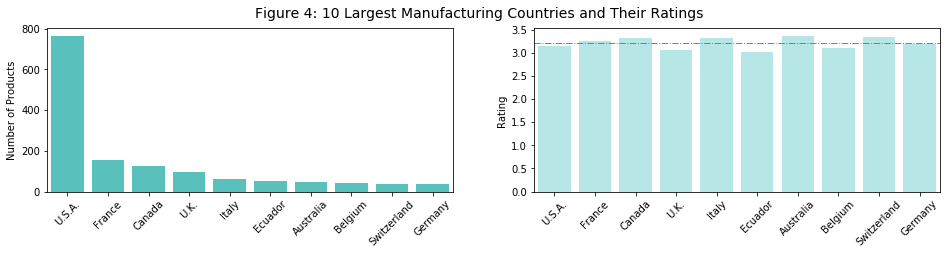

In [11]:
# create subplots
fig, ax = plt.subplots(1,2, figsize=(16,3))
fig.suptitle('Figure 4: 10 Largest Manufacturing Countries and Their Ratings', fontsize=14)

# plot top 10 manufacturers count
ax1 = sns.barplot(x=top_manus['country'], y=top_manus['count'], color='MediumTurquoise', ax=ax[0])
ax1.set(xlabel='', ylabel='Number of Products')
xrotate = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# plot top 10 manufacturers rating
ax2 = sns.barplot(x=top_manus['country'], y=top_manus['rating'], color='PaleTurquoise', ax=ax[1])
ax2.set(xlabel='', ylabel='Rating')
xrotate = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.axhline(top_manus['rating'].mean(), color='grey', linestyle='-.', linewidth=1.0)

Looking at this graph, it's clear that USA is the world's most prolific chocolate manufacturer, having produced 763 chocolate products in this dataset. France and Canada are second and third respectively, but their numbers pale in comparison to that of USA. 

While this figure gives clues for sales and overall consumption by country, it is not an indicator for sales/consumption per capita, nor the quality/rating of chocolates manufactured in respective countries. According to [outside research](https://www.investopedia.com/articles/investing/093015/4-countries-produce-most-chocolate.asp), USA has the largest market share for the chocolate industry, and brings in nearly 20 billion USD annually in retail sales. This figure is not a proof of quality, however. Simply looking at the average rating of all products grouped by each respective country doesn't really tell us anything, as seen by the second graph in figure 4.

So where are the best chocolates from?

## Top Manufacturing Companies & Countries - by rating

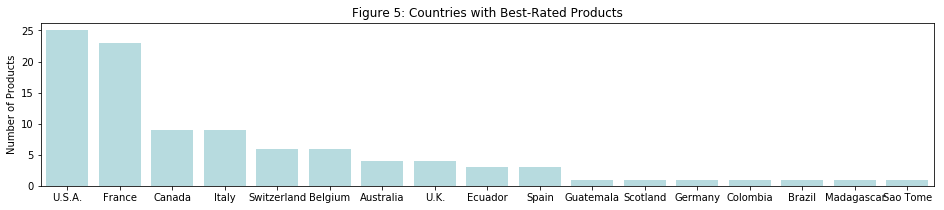

Number of products with 4.0 rating or higher: 99



In [12]:
# pull the best-rated chocolates (4 & 5); recall that no chocolates were rated 4.5
best = []

for index, row in data.iterrows():
    if row['rating'] == 4 or row['rating'] == 5:
        best.append(row)

best = pd.DataFrame(best)

# plot
fig, ax = plt.subplots(figsize=(16,3))
sns.countplot(x='company_location', data=best, order=best['company_location'].value_counts().index, color='PowderBlue', ax=ax)
ax.set_title('Figure 5: Countries with Best-Rated Products')
ax.set(xlabel='', ylabel='Number of Products')
plt.show()

print("Number of products with 4.0 rating or higher: {}\n".format(len(best)))

According to the dataset, there are 99 products rated 4.0 or higher. This graph seems to be somewhat consistent with Figure 4, which showed that USA is clearly the world's largest chocolate manufacturer. With this in mind, it's not difficult to believe that it also produces the most number of best-rated chocolates. 

However, there are 99 products rated 4.0 or higher according to the dataset. To account for the fact that certain countries (eg. USA) simply have more companies, a closer look at the top-rated companies and their locations will only take into account companies with 3 or more products rated 4.0 and up.

In [13]:
best['company'].value_counts().head(20)

Soma                      9
Bonnat                    8
Amedei                    6
Valrhona                  5
Fresco                    4
Pierre Marcolini          4
Idilio (Felchlin)         4
Arete                     3
Michel Cluizel            3
Cacao Sampaka             3
Patric                    3
A. Morin                  3
Pralus                    3
Domori                    3
Pacari                    3
Benoit Nihant             2
Matale                    2
Scharffen Berger          2
Amano                     2
Smooth Chocolator, The    2
Name: company, dtype: int64

In [14]:
companies = []

for index, row in best.iterrows():
    if row['company'] == 'Soma':
        companies.append(row)
    if row['company'] == 'Bonnat':
        companies.append(row)
    if row['company'] == 'Amedei':
        companies.append(row)
    if row['company'] == 'Valrhona':
        companies.append(row)
    if row['company'] == 'Idilio (Felchlin)':
        companies.append(row)
    if row['company'] == 'Fresco':
        companies.append(row)
    if row['company'] == 'Pierre Marcolini':
        companies.append(row)
    if row['company'] == 'Patric':
        companies.append(row)
    if row['company'] == 'Domori':
        companies.append(row)
    if row['company'] == 'Michel Cluizel':
        companies.append(row)
    if row['company'] == 'Pralus':
        companies.append(row)
    if row['company'] == 'A. Morin':
        companies.append(row)

companies = pd.DataFrame(companies)


*Includes companies with 3 or more products rated 4.0 and up


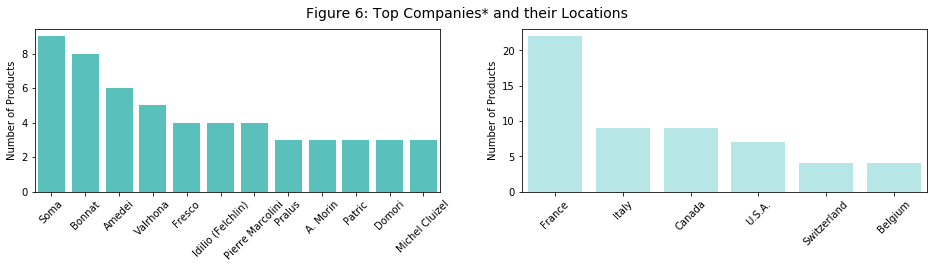

In [15]:
# create subplots
fig, ax = plt.subplots(1,2, figsize=(16,3))
fig.suptitle('Figure 6: Top Companies* and their Locations', fontsize=14)

# plot top 10 manufacturers count
ax1 = sns.countplot(x='company', data=companies, order=companies['company'].value_counts().index, color='MediumTurquoise', ax=ax[0])
ax1.set(xlabel='', ylabel='Number of Products')
xrotate = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
                  
# plot top 10 manufacturers locations
ax2 = sns.countplot(x='company_location', data=companies, order=companies['company_location'].value_counts().index, color='PaleTurquoise', ax=ax[1])
ax2.set(xlabel='', ylabel='Number of Products')
xrotate = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

print("\n*Includes companies with 3 or more products rated 4.0 and up")

- Soma (Canadian company) produced the most number of highly rated chocolates
- France has the most number of companies that produced 3 or more best-rated chocolates

## Top Bean Producers - by the number

In [16]:
# explore bean origins

print(data['origin_broad'].value_counts().head(10))
print('\nWhere a blank origin indicates a blend')

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: origin_broad, dtype: int64

Where a blank origin indicates a blend



* Where a blank origin indicates a blend


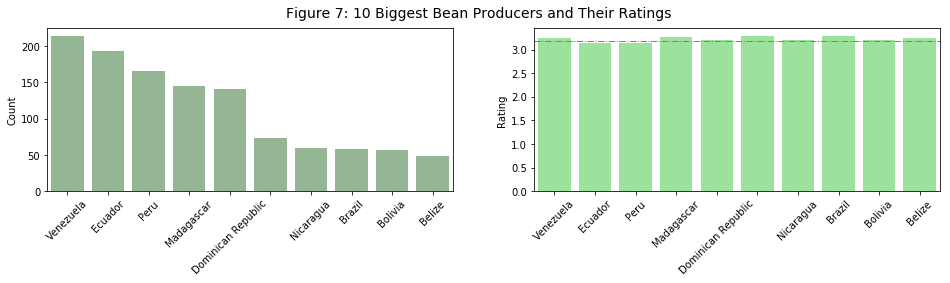

In [17]:
# top 10 bean producers
beans = data['origin_broad'].value_counts().head(10).to_frame().reset_index()
beans.columns = ['country', 'count']

m_ven = data[data['origin_broad'] == 'Venezuela']['rating'].mean()
m_ecu = data[data['origin_broad'] == 'Ecuador']['rating'].mean()
m_per = data[data['origin_broad'] == 'Peru']['rating'].mean()
m_mad = data[data['origin_broad'] == 'Madagascar']['rating'].mean()
m_dom = data[data['origin_broad'] == 'Dominican Republic']['rating'].mean()
m_nic = data[data['origin_broad'] == 'Nicaragua']['rating'].mean()
m_bra = data[data['origin_broad'] == 'Brazil']['rating'].mean()
m_bol = data[data['origin_broad'] == 'Bolivia']['rating'].mean()
m_bel = data[data['origin_broad'] == 'Belize']['rating'].mean()
m_ble = data[data['origin_broad'].str.contains(',')]['rating'].mean()

beans['rating'] = [m_ven, m_ecu, m_per, m_mad, m_dom, m_ble, m_nic, m_bra, m_bol, m_bel]

# create subplots
fig, ax = plt.subplots(1,2, figsize=(16,3))
fig.suptitle('Figure 7: 10 Biggest Bean Producers and Their Ratings', fontsize=14)

# plot top 10 bean producers count
ax1 = sns.barplot(x=beans['country'], y=beans['count'], color='DarkSeaGreen', ax=ax[0])
ax1.set(xlabel='', ylabel='Count')
xrotate = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# plot top 10 bean producers rating
ax2 = sns.barplot(x=beans['country'], y=beans['rating'], color='LightGreen', ax=ax[1])
ax2.set(xlabel='', ylabel='Rating')
xrotate = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position('right')
ax2.axhline(data['rating'].mean(), color='grey', linestyle='-.', linewidth=1.0)


print('\n* Where a blank origin indicates a blend')

According to the dataset, Venezuela, Ecuador, and Peru are the top three producers of world's cocoa beans. Note that the 7th most prolific producer ('blank') is not a single country but blend from multiple origins.

The right-side graph shows the average rating of products made with beans from the largest bean producers. Although these figures seem to remain close to the average rating of all products, it is not an accurate representation of the effect of bean origin as an indicator of quality, as it does not take into account the extreme differences in number of products and range of ratings. 

To get a closer look, we should look at the origin of top-rated products.

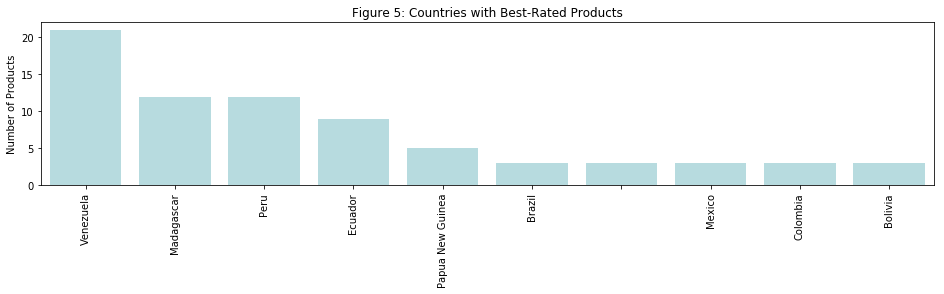


* Where a blank origin indicates a blend



In [22]:
# get top 10 bean producers (by rating)
# recall that the df 'best' includes all products rated 4.0 or higher

beans = best['origin_broad'].value_counts().head(10)
beans = pd.DataFrame(beans).reset_index()

# plot
fig, ax = plt.subplots(figsize=(16,3))
sns.barplot(x='index', y='origin_broad', data=beans, color='PowderBlue', ax=ax)
ax.set_title('Figure 5: Countries with Best-Rated Products')
ax.set(xlabel='', ylabel='Number of Products')
xrotate = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('\n* Where a blank origin indicates a blend\n')

Of the 99 products rated 4.0 and up:

- Venezuela is clearly the leading bean producer for the world's best-rated chocolates
- Madagascar and Peru are tied at 2nd, followed by Ecuador
- Consistent with figure 7, blends make up the 7th best beans

In [23]:
# side look: types of blends
data[data['origin_broad'].str.len()==1]['origin_specific'].unique()

array(['Nine', 'Toscano Black', 'Houseblend', 'Nature', 'Organic Dark',
       'One Hundred', 'Blend', 'Lago di Como, Blu', 'Blend No. 1',
       'Philly Blend, 5 plantations', 'Kendari', 'Tarakan', 'Maragda',
       'Sensations Intense', 'Zorzal Reserva, 2015 H., Kerchner', 'Noir',
       'Ilblend', 'Red Vanilla', 'Supremo- SF', 'Dark',
       'Epique, Blend No. 49', 'Coucher du Soleil', 'Lever du Soleil',
       'Onyx', 'Nocturne', 'Complexite', 'Special Maker Reserve',
       'Quetzalcoatl', 'Tsaranta', 'Semisweet', 'Campesino w/ nibs',
       'Trinitario', 'Downtown London', 'Africa meets Latina', 'Amazonas',
       'one hundred', 'Kuruba', 'Orinoco', 'Excellence (US Version)',
       'Cacao Nib Crunch', 'Brooklyn Blend', 'Carre Amer',
       'Carre Grand Noir', 'Noir Infini',
       'Grand Cru Blend No.1, 5 yr. Anniversary Ed', 'Signature Blend',
       'Raw', 'Mid Mountain, 2014', '100 percent', 'Latino', 'Nibby',
       'Extra Dark', 'Bittersweet', 'Wasatch', "Chef's Blend",
   